In [1]:
# load the CIFAR-100 dataset
import torch 
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from torch.utils.data import ConcatDataset 
from mobilenet import MobileNet
import main  
import os
import logging
from io import StringIO

%load_ext autoreload
%autoreload 2

In [2]:

transform = v2.Compose([v2.PILToTensor(), v2.ToDtype(torch.float, scale=True)]) 
trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                        shuffle=True, num_workers=2)

dataset = trainloader.dataset
generator = torch.Generator()
generator.manual_seed(0)
num_training = 40000
num_validation = 10000
X_train, X_val = torch.utils.data.random_split(dataset=dataset ,lengths=[num_training,num_validation], generator=generator)


x = torch.stack([sample[0] for sample in ConcatDataset([X_train])])
mean = torch.mean(x, dim=(0,2,3))
std = torch.std(x, dim=(0,2,3))
print(f"The mean of new training set is:{mean},\n The standard deviation is: {std}.")

Files already downloaded and verified
The mean of new training set is:tensor([0.5068, 0.4861, 0.4403]),
 The standard deviation is: tensor([0.2671, 0.2563, 0.2759]).


In [41]:

class_label = list()
class_list = dict()

for i, index in enumerate(X_train.indices):
    class_label.append(X_train.dataset[index][-1])

for i in set(class_label):
    class_list[i] = class_label.count(i) / num_training * 100
    class_list[i] = round(class_list[i],4)

class_list_new = {X_train.dataset.classes[i]:value for i, (_, value)
                in enumerate(class_list.items())}
df = pd.DataFrame(data=class_list_new, index=[0])
# df.to_csv("/home/siyu/Documents/assignment-mobilenet-code/df.csv")



In [42]:
cifar100_dir = '/home/siyu/Documents/assignment-mobilenet-code/data/cifar-100-python'

transform_train = v2.Compose([
     v2.PILToTensor(),
     v2.ToDtype(torch.float, scale=True),
     v2.RandomHorizontalFlip(p=0.5),
     v2.RandomCrop((32,32), padding=4)
     ]) 
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

dataset = trainloader.dataset
X_train, X_val = torch.utils.data.random_split(dataset=dataset ,lengths=[num_training,num_validation], generator=generator)

Files already downloaded and verified


In [43]:
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)
len(testloader.dataset.data)

Files already downloaded and verified


10000

In [56]:

with open('/home/siyu/Documents/assignment-mobilenet-code/testv2_log/lr0.01_wd0.0_eps15_schedulerFalse_mixupFalse_alpha0.0.log', 'r') as f:
    f_content = f.read()
    
df = pd.read_csv(StringIO(f_content),skipfooter=1, sep="\.\.", engine='python', header=None) # seperate by ".." 

df_new = pd.DataFrame(df)
for column in df_new.columns:
    split_column = df_new[column].str.split(':', expand=True) # 
    new_column = [f'{column}_{i}' for i in range(1, split_column.shape[1] + 1)]
    df_new[new_column] = split_column

# df_new.drop(columns=df_new.columns[:len(df.columns)], inplace=True)

columns = [cl for cl in range(len(df_new.columns)) if all(isinstance(value, str) for value in df_new.values[0][cl])]
# df_new.drop(columns=columns, inplace=True)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_800960/905948895.py:4: SyntaxWarning: invalid escape sequence '\.'
  df = pd.read_csv(StringIO(f_content),skipfooter=1, sep="\.\.", engine='python', header=None) # seperate by ".."


In [57]:
columns_to_drop = [0,1,2,3,4,5,'0_1','0_2']
df_new

,0,1,2,3,4,5,0_1,0_2,0_3,1_1,1_2,2_1,2_2,3_1,3_2,4_1,4_2,5_1,5_2
0,INFO:root:Epoch 1/15,Learning rate: 0.0100,Train loss: 4.2870,Train acc: 0.0473,Val loss: 3.8904,Val acc: 0.0936,INFO,root,Epoch 1/15,Learning rate,0.0100,Train loss,4.2870,Train acc,0.0473,Val loss,3.8904,Val acc,0.0936
1,INFO:root:Epoch 2/15,Learning rate: 0.0100,Train loss: 3.7450,Train acc: 0.1178,Val loss: 3.5339,Val acc: 0.1501,INFO,root,Epoch 2/15,Learning rate,0.0100,Train loss,3.7450,Train acc,0.1178,Val loss,3.5339,Val acc,0.1501
2,INFO:root:Epoch 3/15,Learning rate: 0.0100,Train loss: 3.4484,Train acc: 0.1673,Val loss: 3.3652,Val acc: 0.1938,INFO,root,Epoch 3/15,Learning rate,0.0100,Train loss,3.4484,Train acc,0.1673,Val loss,3.3652,Val acc,0.1938
3,INFO:root:Epoch 4/15,Learning rate: 0.0100,Train loss: 3.2366,Train acc: 0.2041,Val loss: 3.1217,Val acc: 0.2273,INFO,root,Epoch 4/15,Learning rate,0.0100,Train loss,3.2366,Train acc,0.2041,Val loss,3.1217,Val acc,0.2273
4,INFO:root:Epoch 5/15,Learning rate: 0.0100,Train loss: 3.0674,Train acc: 0.2366,Val loss: 3.1059,Val acc: 0.2388,INFO,root,Epoch 5/15,Learning rate,0.0100,Train loss,3.0674,Train acc,0.2366,Val loss,3.1059,Val acc,0.2388
5,INFO:root:Epoch 6/15,Learning rate: 0.0100,Train loss: 2.9325,Train acc: 0.2621,Val loss: 2.9618,Val acc: 0.2700,INFO,root,Epoch 6/15,Learning rate,0.0100,Train loss,2.9325,Train acc,0.2621,Val loss,2.9618,Val acc,0.2700
6,INFO:root:Epoch 7/15,Learning rate: 0.0100,Train loss: 2.7996,Train acc: 0.2863,Val loss: 2.8530,Val acc: 0.2812,INFO,root,Epoch 7/15,Learning rate,0.0100,Train loss,2.7996,Train acc,0.2863,Val loss,2.8530,Val acc,0.2812
7,INFO:root:Epoch 8/15,Learning rate: 0.0100,Train loss: 2.6820,Train acc: 0.3072,Val loss: 2.7186,Val acc: 0.3092,INFO,root,Epoch 8/15,Learning rate,0.0100,Train loss,2.6820,Train acc,0.3072,Val loss,2.7186,Val acc,0.3092
8,INFO:root:Epoch 9/15,Learning rate: 0.0100,Train loss: 2.5653,Train acc: 0.3329,Val loss: 2.6577,Val acc: 0.3262,INFO,root,Epoch 9/15,Learning rate,0.0100,Train loss,2.5653,Train acc,0.3329,Val loss,2.6577,Val acc,0.3262
9,INFO:root:Epoch 10/15,Learning rate: 0.0100,Train loss: 2.4585,Train acc: 0.3573,Val loss: 2.5582,Val acc: 0.3443,INFO,root,Epoch 10/15,Learning rate,0.0100,Train loss,2.4585,Train acc,0.3573,Val loss,2.5582,Val acc,0.3443


In [58]:
df_new.drop(columns=columns_to_drop, inplace=True)
df_new


,0_3,1_1,1_2,2_1,2_2,3_1,3_2,4_1,4_2,5_1,5_2
0,Epoch 1/15,Learning rate,0.0100,Train loss,4.2870,Train acc,0.0473,Val loss,3.8904,Val acc,0.0936
1,Epoch 2/15,Learning rate,0.0100,Train loss,3.7450,Train acc,0.1178,Val loss,3.5339,Val acc,0.1501
2,Epoch 3/15,Learning rate,0.0100,Train loss,3.4484,Train acc,0.1673,Val loss,3.3652,Val acc,0.1938
3,Epoch 4/15,Learning rate,0.0100,Train loss,3.2366,Train acc,0.2041,Val loss,3.1217,Val acc,0.2273
4,Epoch 5/15,Learning rate,0.0100,Train loss,3.0674,Train acc,0.2366,Val loss,3.1059,Val acc,0.2388
5,Epoch 6/15,Learning rate,0.0100,Train loss,2.9325,Train acc,0.2621,Val loss,2.9618,Val acc,0.2700
6,Epoch 7/15,Learning rate,0.0100,Train loss,2.7996,Train acc,0.2863,Val loss,2.8530,Val acc,0.2812
7,Epoch 8/15,Learning rate,0.0100,Train loss,2.6820,Train acc,0.3072,Val loss,2.7186,Val acc,0.3092
8,Epoch 9/15,Learning rate,0.0100,Train loss,2.5653,Train acc,0.3329,Val loss,2.6577,Val acc,0.3262
9,Epoch 10/15,Learning rate,0.0100,Train loss,2.4585,Train acc,0.3573,Val loss,2.5582,Val acc,0.3443


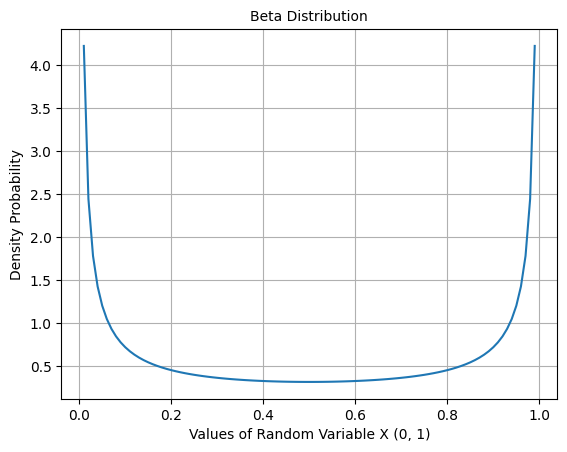

In [33]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
a =  0.2
b =  0.2
x = np.arange (0.01, 1, 0.01)
y = beta.pdf(x,a,b)
plt.plot(x,y)
plt.title('Beta Distribution with alpha 0.2', fontsize='10')
plt.xlabel('Random Variable X (0, 1)', fontsize='10')
plt.ylabel('Density Probability', fontsize='10')
plt.grid(True)
plt.savefig('diagram/beta_dist.png')